# Sales Analysis and Forecasting

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
import warnings
import itertools
from pylab import rcParams
from prophet import Prophet

## Settings

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Data Preprocessing

In [3]:
df = pd.read_excel("train.xlsx")
data = df.loc[df['Category'] == 'Office Supplies', ['Order Date', 'Sales']]
data['Order Date'].min(), data['Order Date'].max()
data

,Order Date,Sales
2,2017-06-12,14.620
4,2016-10-11,22.368
6,2015-06-09,7.280
8,2015-06-09,18.504
9,2015-06-09,114.900
...,...,...
9791,2015-05-21,56.064
9793,2015-05-21,4.832
9794,2015-05-21,18.240
9795,2017-05-21,3.798


In [4]:
data = data.sort_values('Order Date')
data.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [5]:
data = data.groupby('Order Date')['Sales'].sum().reset_index()
data

,Order Date,Sales
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,685.340
4,2015-01-07,10.430
...,...,...
1138,2018-12-26,814.594
1139,2018-12-27,13.248
1140,2018-12-28,1091.244
1141,2018-12-29,282.440


In [6]:
data = data.set_index('Order Date')
data.index

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-09', '2015-01-10', '2015-01-13',
               '2015-01-16', '2015-01-18',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1143, freq=None)

In [7]:
y = data['Sales'].resample('MS').mean()
y['2018':]

Order Date
2018-01-01     956.953591
2018-02-01     388.324842
2018-03-01     538.568370
2018-04-01     526.479519
2018-05-01     499.770519
2018-06-01     546.965423
2018-07-01     393.821385
2018-08-01    1146.137077
2018-09-01    1128.840107
2018-10-01     873.400000
2018-11-01    1124.012036
2018-12-01    1022.000414
Freq: MS, Name: Sales, dtype: float64

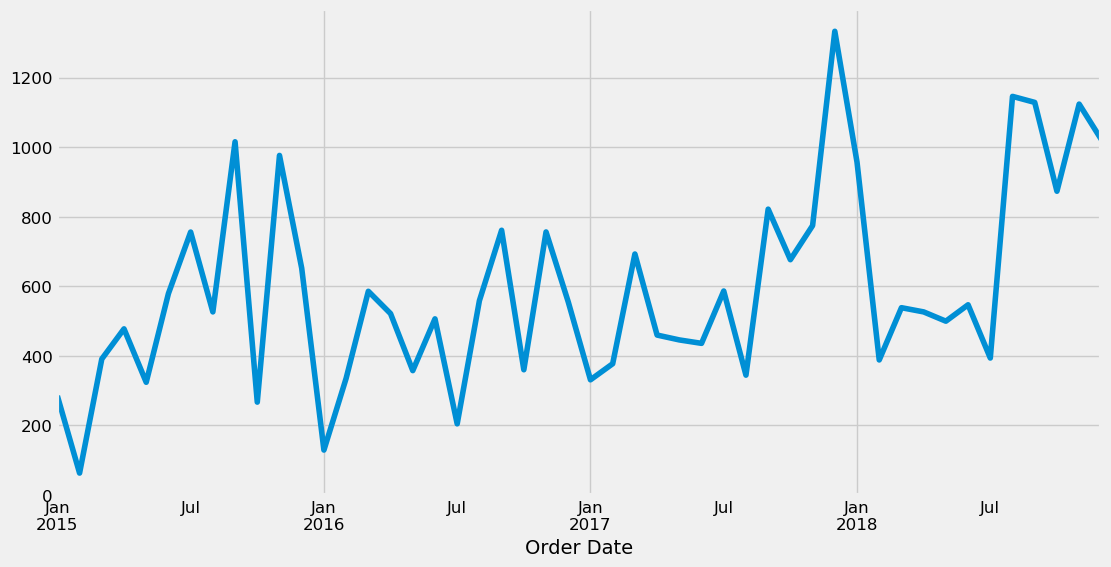

In [8]:
y.plot(figsize = (12, 6))
plt.show()

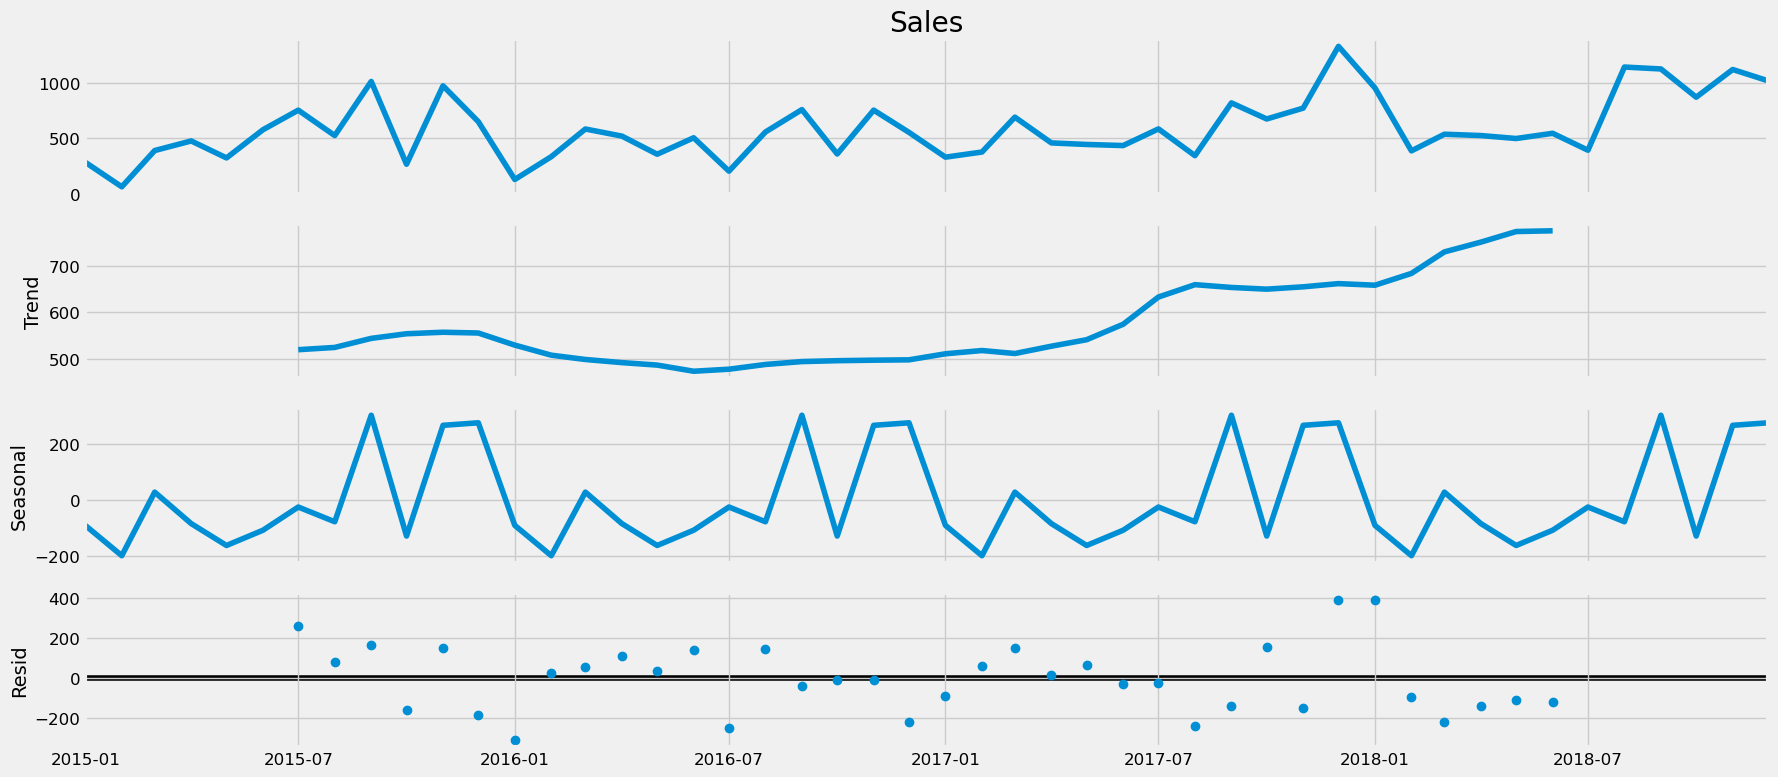

In [9]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [11]:
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMAX: {} X {}' .format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}' .format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} X {}' .format(pdq[3], seasonal_pdq[3]))
print('SARIMAX: {} X {}' .format(pdq[4], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 1, 0) X (0, 1, 0, 12)
SARIMAX: (0, 1, 1) X (0, 1, 1, 12)
SARIMAX: (1, 0, 0) X (1, 0, 0, 12)


In [12]:
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = seasonal_param, enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA:{} x {}12 - AIC:{}'.format(param, seasonal_param, results.aic))
        except:
            continue

ARIMA:(0, 0, 0) x (0, 0, 0, 12)12 - AIC:745.785108307311
ARIMA:(0, 0, 0) x (0, 0, 1, 12)12 - AIC:1609.3472845229194
ARIMA:(0, 0, 0) x (0, 1, 0, 12)12 - AIC:498.8308917559917
ARIMA:(0, 0, 0) x (0, 1, 1, 12)12 - AIC:332.919731165441
ARIMA:(0, 0, 0) x (1, 0, 0, 12)12 - AIC:514.1730803576957
ARIMA:(0, 0, 0) x (1, 0, 1, 12)12 - AIC:1760.8375185514026
ARIMA:(0, 0, 0) x (1, 1, 0, 12)12 - AIC:346.6194401828426
ARIMA:(0, 0, 0) x (1, 1, 1, 12)12 - AIC:333.8632878970721
ARIMA:(0, 0, 1) x (0, 0, 0, 12)12 - AIC:701.1580021511512
ARIMA:(0, 0, 1) x (0, 0, 1, 12)12 - AIC:2731.495251243803
ARIMA:(0, 0, 1) x (0, 1, 0, 12)12 - AIC:485.90012072112313
ARIMA:(0, 0, 1) x (0, 1, 1, 12)12 - AIC:319.1357349738537
ARIMA:(0, 0, 1) x (1, 0, 0, 12)12 - AIC:515.5825080627565
ARIMA:(0, 0, 1) x (1, 0, 1, 12)12 - AIC:2651.0456016813537
ARIMA:(0, 0, 1) x (1, 1, 0, 12)12 - AIC:344.996817321398
ARIMA:(0, 0, 1) x (1, 1, 1, 12)12 - AIC:320.1616647190842
ARIMA:(0, 1, 0) x (0, 0, 0, 12)12 - AIC:664.2929060935322
ARIMA:(0, 1, 

In [13]:
mod = sm.tsa.statespace.SARIMAX(y, order = (0, 1, 1), seasonal_order = (0, 1, 1, 12), enforce_stationarity = False, enforce_invertibility = False, initialization='approximate_diffuse')
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8523      0.161     -5.290      0.000      -1.168      -0.537
ma.S.L12      -1.4554      1.897     -0.767      0.443      -5.174       2.263
sigma2      2.774e+04   5.47e+04      0.507      0.612   -7.96e+04    1.35e+05


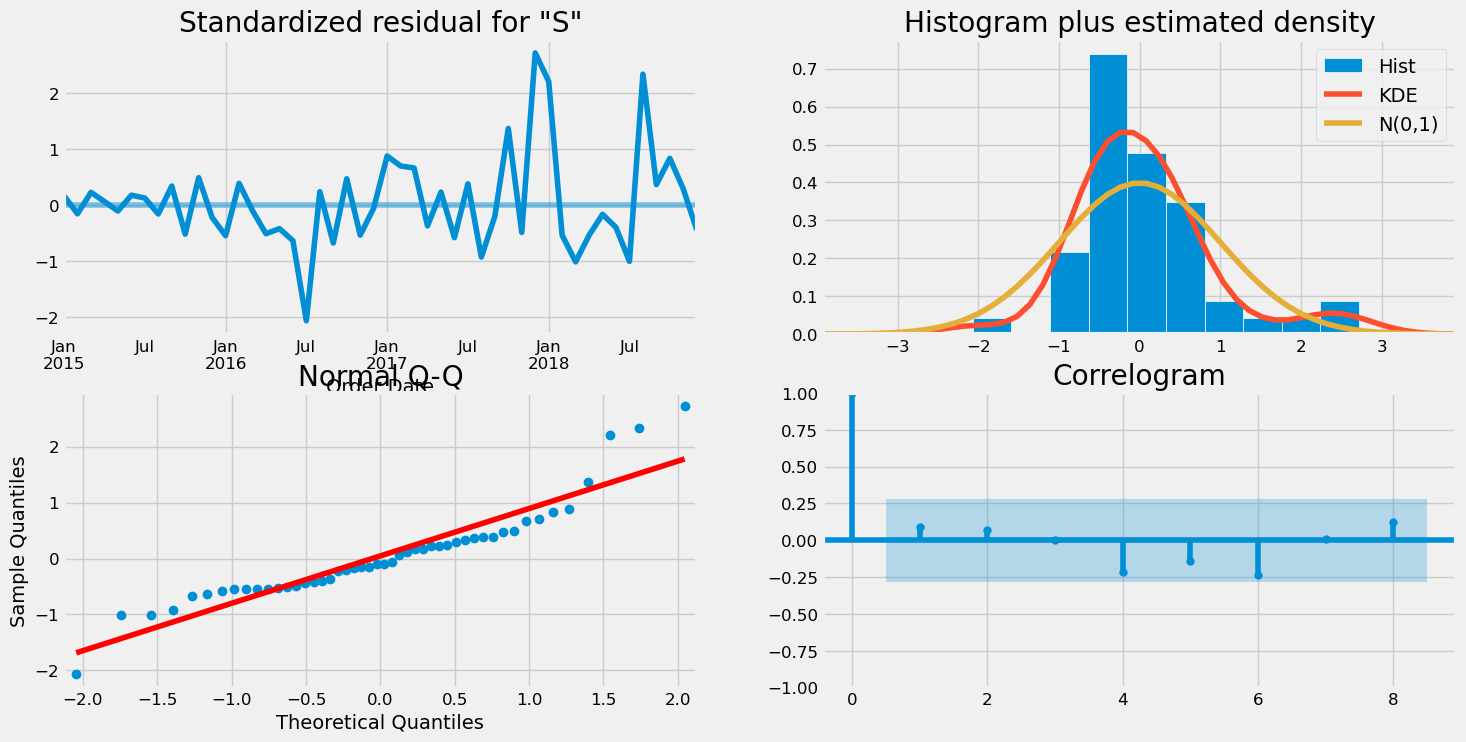

In [14]:
results.plot_diagnostics(figsize = (16, 8), lags = 8)
plt.show()

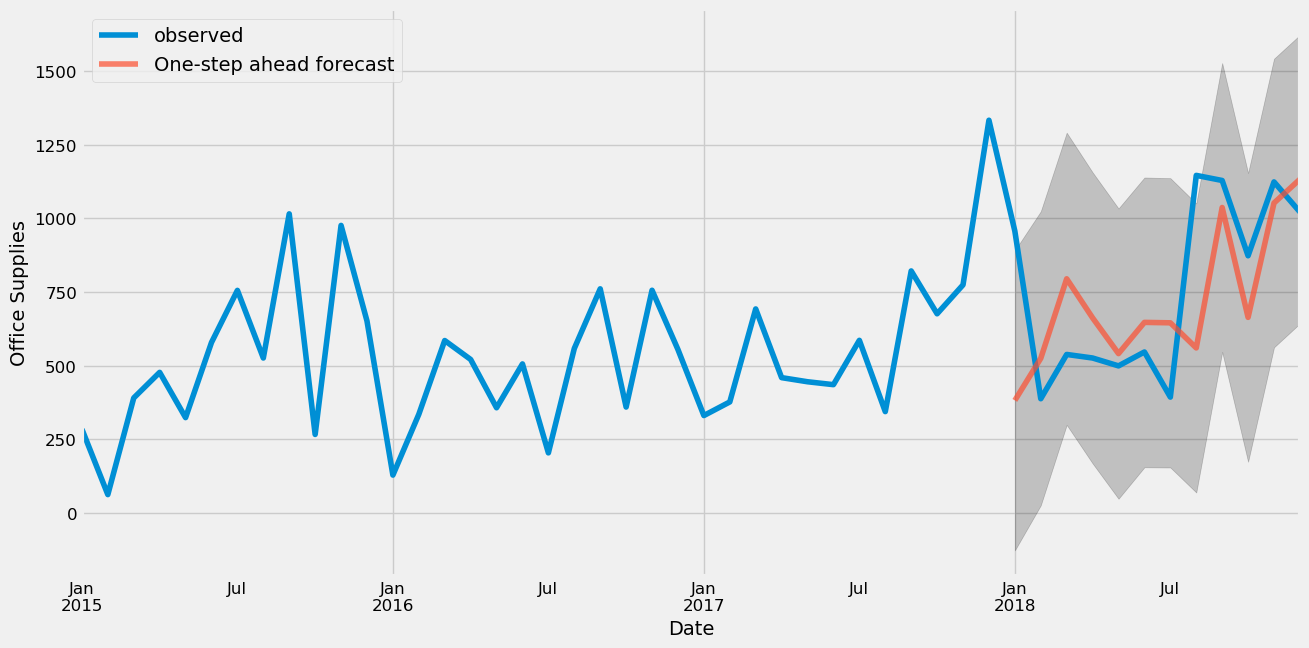

In [15]:
pred = results.get_prediction(start = pd.to_datetime('2018-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = y['2015':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead forecast', alpha = .7, figsize = (14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies')
plt.legend()
plt.show()

In [16]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('Mean squared error{} ' .format(round(mse, 2)))
print('Root mean squared error{} ' .format(round(np.sqrt(mse), 2)))

Mean squared error76736.43 
Root mean squared error277.01 


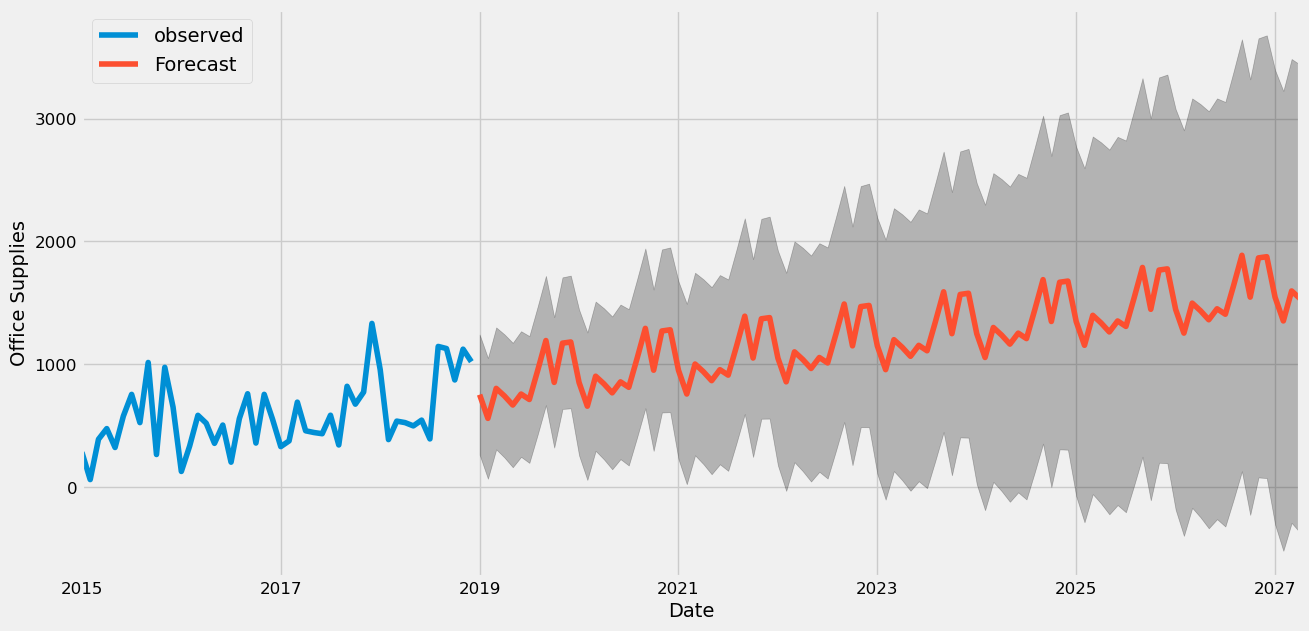

In [17]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies')
plt.legend()
plt.show()

In [18]:
furniture = df.loc[df['Category'] == 'Furniture', ['Order Date', 'Sales']]
tech = df.loc[df['Category'] == 'Technology', ['Order Date', 'Sales']]
furniture.shape, tech.shape

((2078, 2), (1813, 2))

In [19]:
furniture

,Order Date,Sales
0,2017-11-08,261.9600
1,2017-11-08,731.9400
3,2016-10-11,957.5775
5,2015-06-09,48.8600
10,2015-06-09,1706.1840
...,...,...
9786,2015-11-05,149.9000
9787,2018-03-27,1023.3320
9788,2018-03-27,600.5580
9790,2018-03-27,211.2460


In [20]:
tech

,Order Date,Sales
7,2015-06-09,907.152
11,2015-06-09,911.424
19,2015-08-27,213.480
26,2017-01-16,90.570
35,2017-12-08,1097.544
...,...,...
9780,2017-09-14,437.850
9789,2018-03-27,39.992
9797,2016-01-12,235.188
9798,2016-01-12,26.376


In [21]:
furniture = furniture.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date': y_furniture.index, 'Sales': y_furniture.values})

tech = tech.sort_values('Order Date')
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()
tech = tech.set_index('Order Date')
y_tech = tech['Sales'].resample('MS').mean()
tech = pd.DataFrame({'Order Date': y_tech.index, 'Sales': y_tech.values})

store = furniture.merge(tech, how = 'inner', on = 'Order Date')
store.rename(columns = {'Sales_x':'Furniture Sales',  'Sales_y':'Tech Sales'}, inplace = True)
store.head()

,Order Date,Furniture Sales,Tech Sales
0,2015-01-01,518.106417,449.041429
1,2015-02-01,367.931600,229.787143
2,2015-03-01,837.845176,2157.331600
3,2015-04-01,567.488357,640.938857
4,2015-05-01,432.049188,564.698588


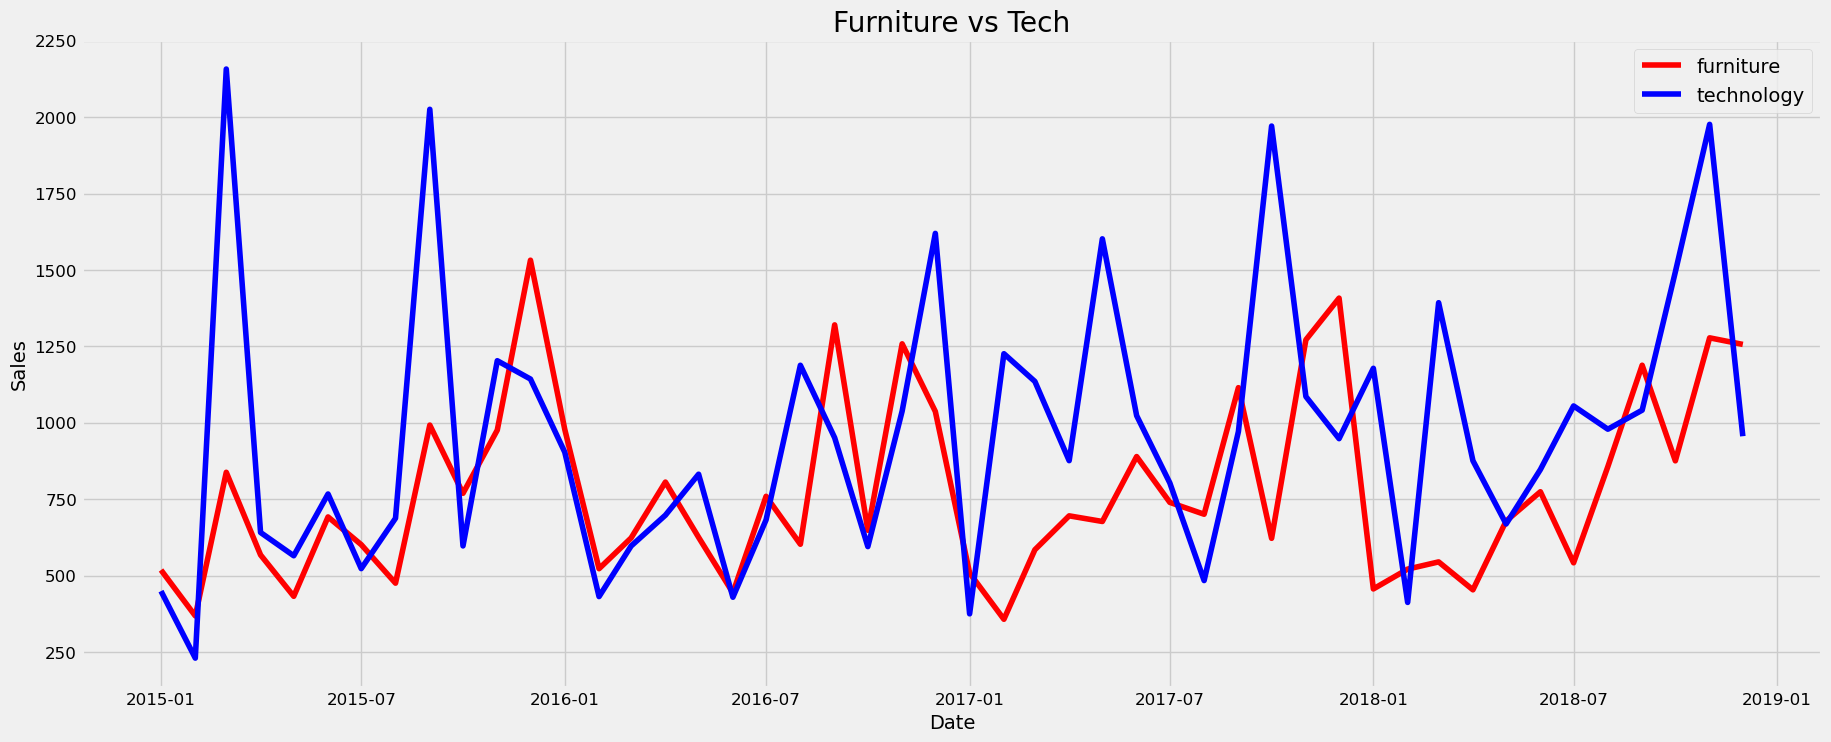

In [22]:
plt.figure(figsize = (20, 8))
plt.plot(store['Order Date'], store['Furniture Sales'], 'r-', label = 'furniture')
plt.plot(store['Order Date'], store['Tech Sales'], 'b-', label = 'technology')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Tech')
plt.legend()
plt.show()

In [23]:
furniture = furniture.rename(columns = {'Order Date':'ds', 'Sales':'y'})
furniture_model = Prophet(interval_width = 0.95)
furniture_model.fit(furniture)
furniture_forecast = furniture_model.make_future_dataframe(periods = 36, freq = 'MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

16:14:14 - cmdstanpy - INFO - Chain [1] start processing
16:14:15 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Furniture Sales')

<Figure size 1800x600 with 0 Axes>

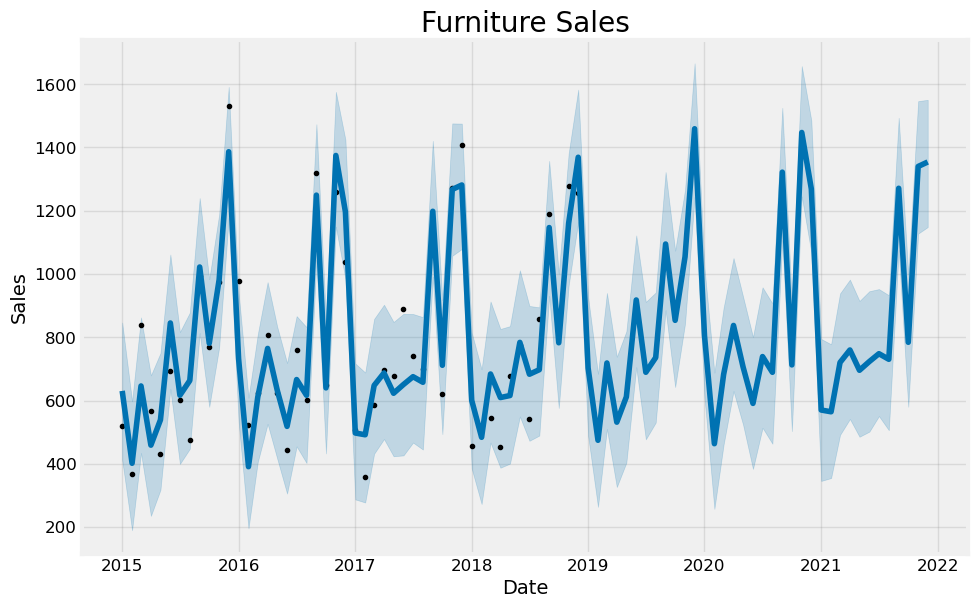

In [24]:
plt.figure(figsize = (18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')

16:14:16 - cmdstanpy - INFO - Chain [1] start processing
16:14:16 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Technology Sales')

<Figure size 1800x600 with 0 Axes>

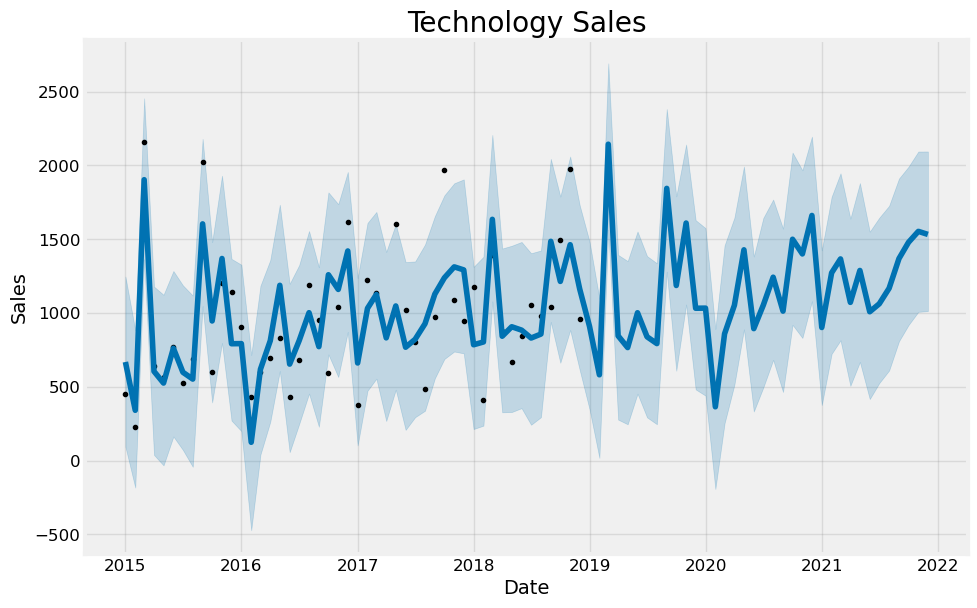

In [25]:
tech = tech.rename(columns = {'Order Date':'ds', 'Sales':'y'})
tech_model = Prophet(interval_width = 0.95)
tech_model.fit(tech)
tech_forecast = tech_model.make_future_dataframe(periods = 36, freq = 'MS')
tech_forecast = tech_model.predict(tech_forecast)

plt.figure(figsize = (18, 6))
tech_model.plot(tech_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Technology Sales')

In [26]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_furniture_forecast.columns = furniture_names

tech_names = ['tech_%s' % column for column in tech_forecast.columns]
merge_tech_forecast = tech_forecast.copy()
merge_tech_forecast.columns = tech_names

forecast = pd.merge(merge_furniture_forecast, merge_tech_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'tech_ds')
forecast = forecast.rename(columns = {'furniture_ds':'Date'}).drop('tech_ds', axis = 1)
forecast

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,tech_additive_terms,tech_additive_terms_lower,tech_additive_terms_upper,tech_yearly,tech_yearly_lower,tech_yearly_upper,tech_multiplicative_terms,tech_multiplicative_terms_lower,tech_multiplicative_terms_upper,tech_yhat
0,2015-01-01,723.843981,412.511910,846.570385,723.843981,723.843981,-93.389698,-93.389698,-93.389698,-93.389698,...,-67.322967,-67.322967,-67.322967,-67.322967,-67.322967,-67.322967,0.0,0.0,0.0,667.938789
1,2015-02-01,725.385827,190.025909,597.672280,725.385827,725.385827,-323.719439,-323.719439,-323.719439,-323.719439,...,-399.819203,-399.819203,-399.819203,-399.819203,-399.819203,-399.819203,0.0,0.0,0.0,340.544728
2,2015-03-01,726.778461,434.345621,862.694369,726.778461,726.778461,-80.656726,-80.656726,-80.656726,-80.656726,...,1157.956835,1157.956835,1157.956835,1157.956835,1157.956835,1157.956835,0.0,0.0,0.0,1902.929182
3,2015-04-01,728.320306,235.398072,679.521498,728.320306,728.320306,-269.373874,-269.373874,-269.373874,-269.373874,...,-145.546628,-145.546628,-145.546628,-145.546628,-145.546628,-145.546628,0.0,0.0,0.0,604.527895
4,2015-05-01,729.812414,317.862977,750.163095,729.812414,729.812414,-190.835950,-190.835950,-190.835950,-190.835950,...,-230.033578,-230.033578,-230.033578,-230.033578,-230.033578,-230.033578,0.0,0.0,0.0,524.978533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2021-08-01,843.411584,506.284776,932.908437,843.411522,843.411654,-113.044899,-113.044899,-113.044899,-113.044899,...,36.460153,36.460153,36.460153,36.460153,36.460153,36.460153,0.0,0.0,0.0,1167.387426
80,2021-09-01,844.953429,1075.657842,1493.609703,844.953362,844.953503,425.949674,425.949674,425.949674,425.949674,...,232.356097,232.356097,232.356097,232.356097,232.356097,232.356097,0.0,0.0,0.0,1368.385547
81,2021-10-01,846.445538,580.340572,998.883158,846.445467,846.445614,-62.299794,-62.299794,-62.299794,-62.299794,...,337.554513,337.554513,337.554513,337.554513,337.554513,337.554513,0.0,0.0,0.0,1478.521553
82,2021-11-01,847.987383,1127.686434,1546.429931,847.987307,847.987463,491.911390,491.911390,491.911390,491.911390,...,406.836119,406.836119,406.836119,406.836119,406.836119,406.836119,0.0,0.0,0.0,1552.905335


Text(0.5, 1.0, 'Furniture vs Technology Trend')

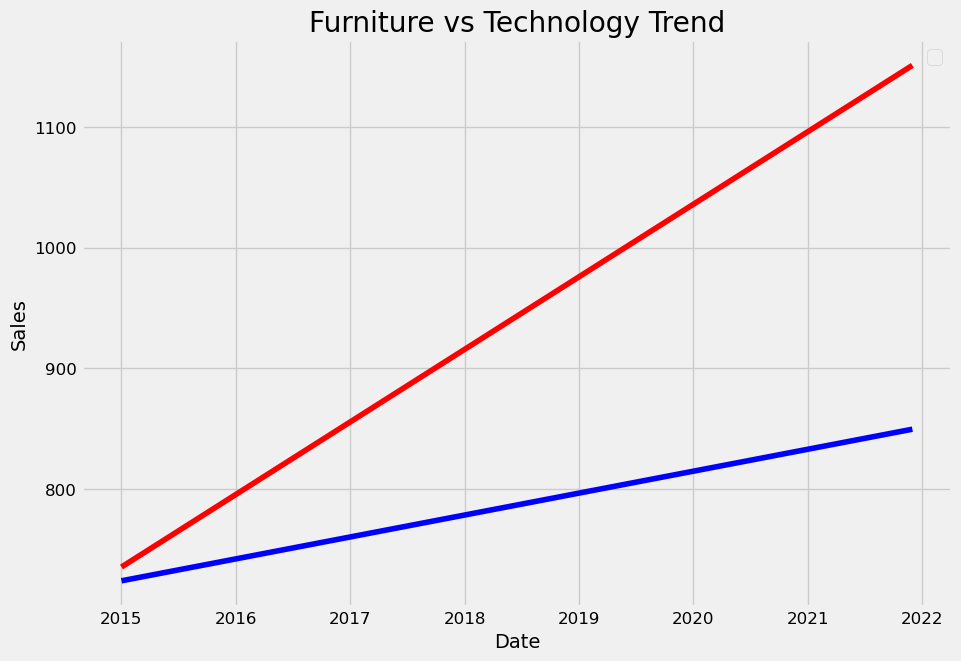

In [27]:
plt.figure(figsize = (10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['tech_trend'], 'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Technology Trend')

Text(0.5, 1.0, 'Furniture vs Technology Estimate')

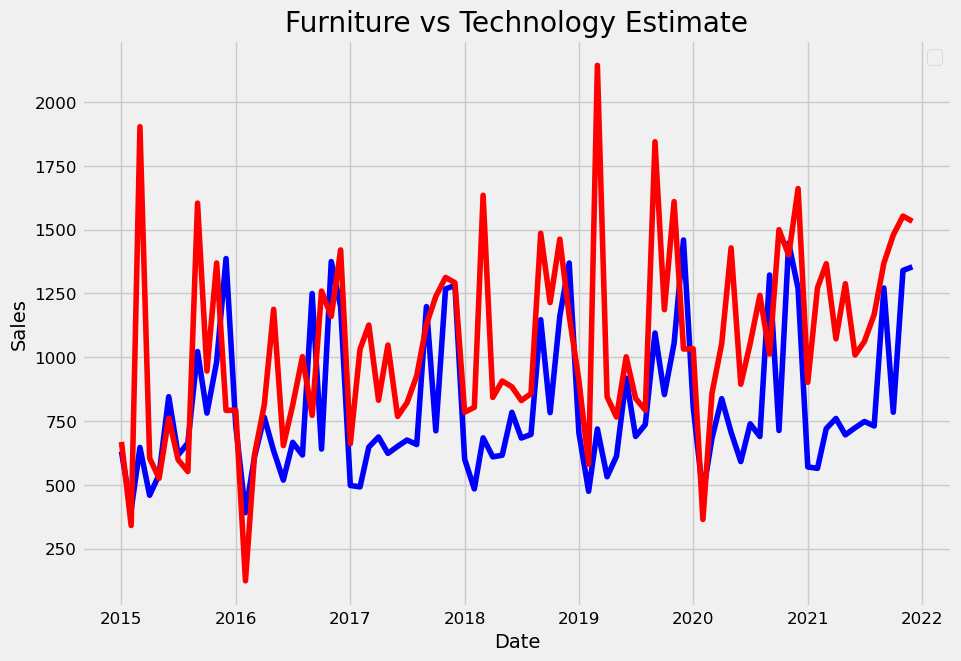

In [28]:
plt.figure(figsize = (10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['tech_yhat'], 'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Technology Estimate')

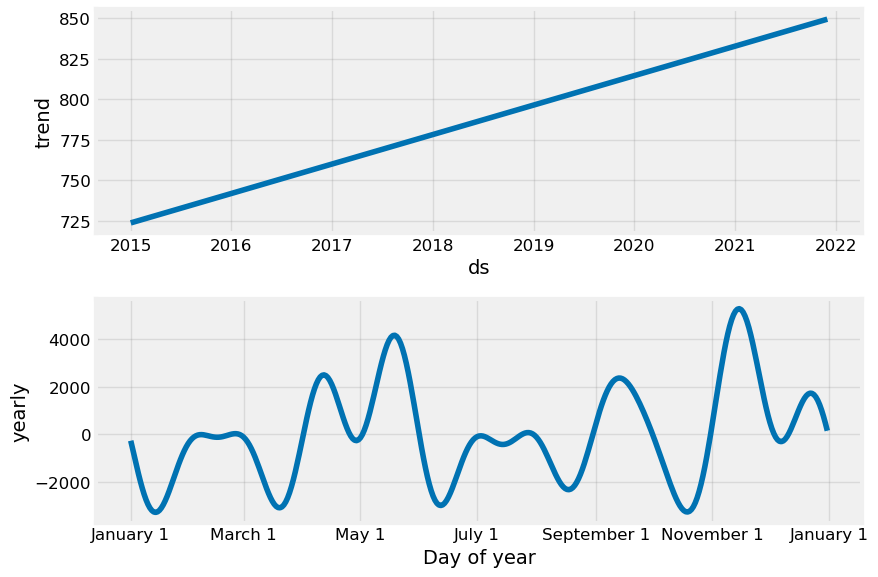

In [29]:
furniture_model.plot_components(furniture_forecast);

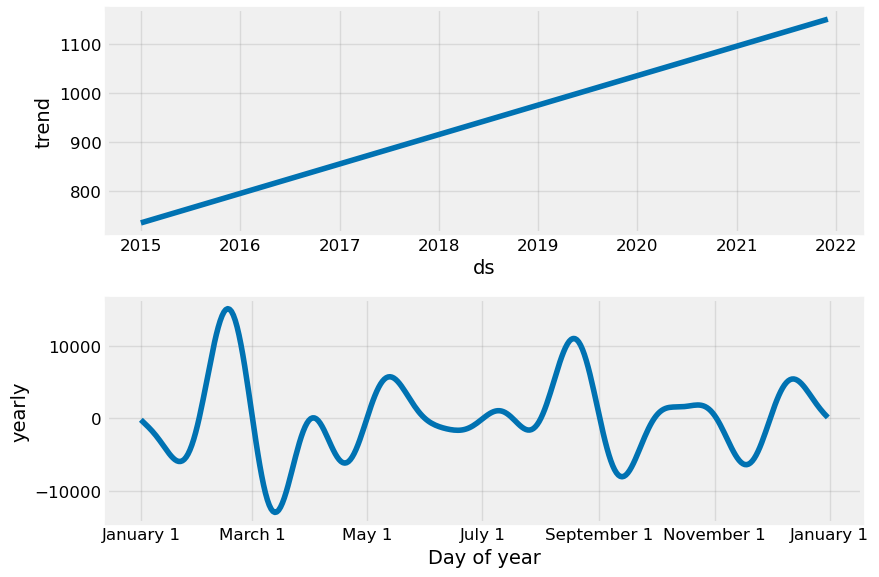

In [30]:
tech_model.plot_components(tech_forecast);